In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2

# Gerchberg Saxton


In [2]:
def calculate_optical_field(diffraction_plane, phase, wavelength, distance):
    # Apply the phase to the diffraction plane field
    diffraction_plane = diffraction_plane * np.exp(1j * phase)
    
    # Fourier transform to the image plane
    optical_field_image_plane = fft2(diffraction_plane)
    
    return optical_field_image_plane

In [3]:
def gerchberg_saxton(input_intensity, target_intensity, num_iterations, wavelength, distance):
    # Initialize phase distribution randomly
    phase = np.random.rand(*input_intensity.shape) * 2 * np.pi

    for _ in range(num_iterations):
        # Calculate the optical field at the image plane
        optical_field_image_plane = calculate_optical_field(np.sqrt(input_intensity), phase, wavelength, distance)
        
        # Get the amplitude and phase at the image plane
        amplitude_image_plane = np.abs(optical_field_image_plane)
        phase_image_plane = np.angle(optical_field_image_plane)
        
        # Replace amplitude with target intensity
        updated_field_image_plane = np.sqrt(target_intensity) * np.exp(1j * phase_image_plane)
        
        # Inverse Fourier transform to the diffraction plane
        optical_field_diffraction_plane = ifft2(updated_field_image_plane)
        
        # Update the phase
        phase = np.angle(optical_field_diffraction_plane)
        
        if _ % 10 == 0:
            print(f"Iteration: {_}")
    
    # Final optical field with updated phase
    final_optical_field = np.sqrt(input_intensity) * np.exp(1j * phase)
    
    return np.abs(ifft2(fft2(final_optical_field)))**2

In [4]:
def cost_function(num_iterations, input_intensity, target_intensity, wavelength, distance):
    result = gerchberg_saxton(input_intensity, target_intensity, num_iterations, wavelength, distance)
    return np.sum((result - target_intensity)**2)

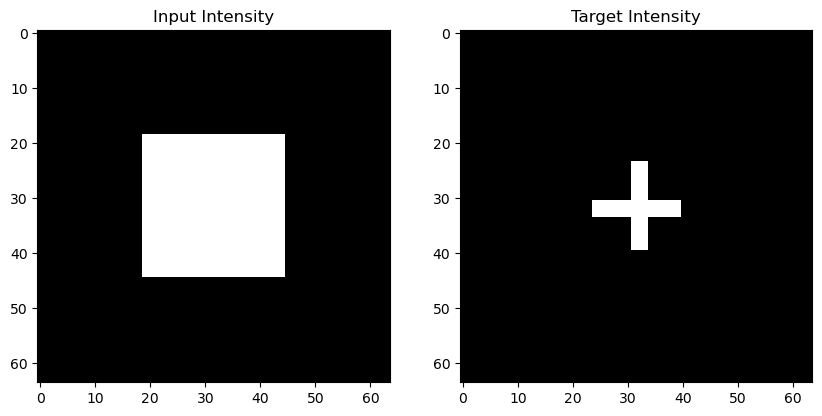

In [5]:
size = 64
wavelength = 0.5e-6
distance = 0.3

# Create arrays for x and y values
x = np.linspace(-5, 5, size)
y = np.linspace(-5, 5, size)

# Create a meshgrid from x and y
X, Y = np.meshgrid(x, y)

# Create input and target intensity distributions
input_intensity = np.zeros((size, size))
axis_range_x = (X >= -2) & (X <= 2)
axis_range_y = (Y >= -2) & (Y <= 2)
input_intensity[axis_range_x & axis_range_y] = 1.0

target_intensity = np.zeros((size, size))
width = size // 48
center_x = size // 2
center_y = size // 2
target_intensity[center_x - width: center_x + width + 1, 24: 40] = 1.0
target_intensity[24: 40, center_y - width: center_y + width + 1] = 1.0

# Plot the input and target intensity distributions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(input_intensity, cmap='gray')
plt.title('Input Intensity')

plt.subplot(1, 2, 2)
plt.imshow(target_intensity, cmap='gray')
plt.title('Target Intensity')

plt.show()
# print(input_intensity.shape())


In [6]:
# initial_iter = 100
# learning_rate = 0.0005
# epochs = 10

# for epoch in range(epochs):
#     cost_current = cost_function(int(initial_iter), input_intensity, target_intensity, wavelength, distance)
#     cost_next = cost_function(int(initial_iter + 1), input_intensity, target_intensity, wavelength, distance)
    
#     gradient = (cost_next - cost_current) / 1
    
#     initial_iter -= learning_rate * gradient
    
# print(initial_iter)


# Run Gerchberg-Saxton algorithm
initial_iter = 100
result = gerchberg_saxton(input_intensity, target_intensity, initial_iter, wavelength, distance)

Iteration: 0
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90


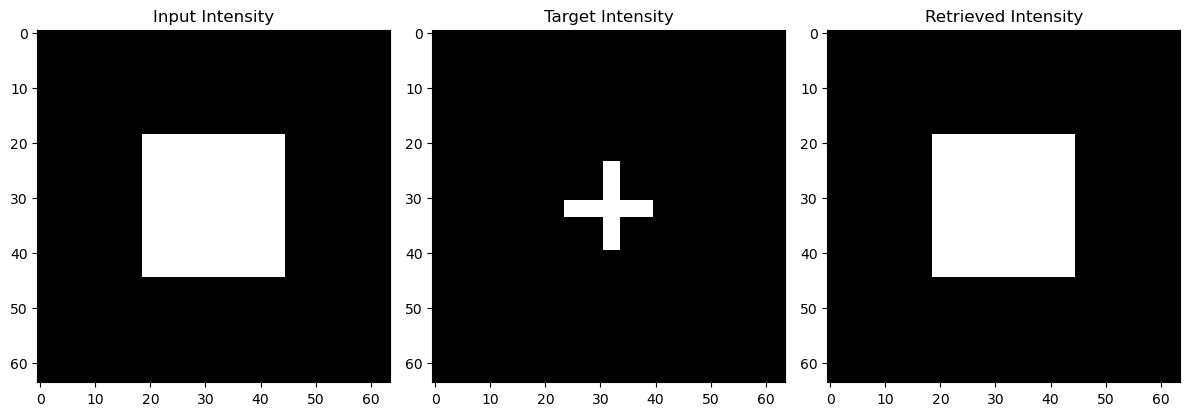

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(input_intensity, cmap='gray')
plt.title('Input Intensity')

plt.subplot(1, 3, 2)
plt.imshow(target_intensity, cmap='gray')
plt.title('Target Intensity')

plt.subplot(1, 3, 3)
plt.imshow(result, cmap='gray')
plt.title('Retrieved Intensity')

plt.tight_layout()
plt.show()

plot results

# Iterative Fourier Transform Algorithm (IFTA)

In [12]:
def ifta(input_field, target_amplitude, target_phase, num_iterations):
    for _ in range(num_iterations):
        # Fourier transform to the output plane
        output_field = fft2(input_field)
        
        # Replace amplitude and phase with target values
        output_amplitude = target_amplitude * np.exp(1j * target_phase)
        output_field = np.abs(output_amplitude) * np.exp(1j * np.angle(output_field))
        
        # Inverse Fourier transform to the input plane
        input_field = ifft2(output_field)

    return np.abs(input_field), np.angle(input_field)

In [21]:
# # Example usage:
# input_field = ...  # Define your initial complex field distribution
# target_amplitude = ...  # Define your desired amplitude distribution
# target_phase = ...  # Define your desired phase distribution
size = 256
x, y = np.meshgrid(np.linspace(-1, 1, size), np.linspace(-1, 1, size))
initial_amplitude = np.exp(-(x**2 + y**2) / (2 * 0.1**2))
initial_phase = np.zeros_like(initial_amplitude)


input_field = initial_amplitude * np.exp(1j * initial_phase)
target_amplitude = np.exp(-(x**2 + y**2) / (2 * 0.2**2))
target_phase = np.arctan2(y, x)

iterations = 100000

result_amplitude, result_phase = ifta(input_field, target_amplitude, target_phase, iterations)

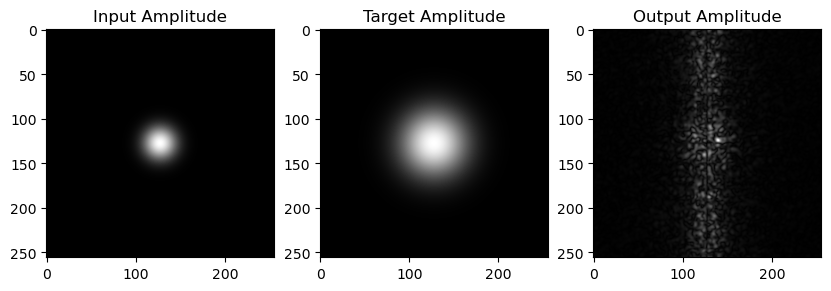

In [22]:
# Plot the results
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(np.abs(input_field), cmap='gray')
plt.title('Input Amplitude')

plt.subplot(1, 3, 2)
plt.imshow(target_amplitude, cmap='gray')
plt.title('Target Amplitude')

plt.subplot(1, 3, 3)
plt.imshow(result_amplitude, cmap='gray')
plt.title('Output Amplitude')

plt.show()

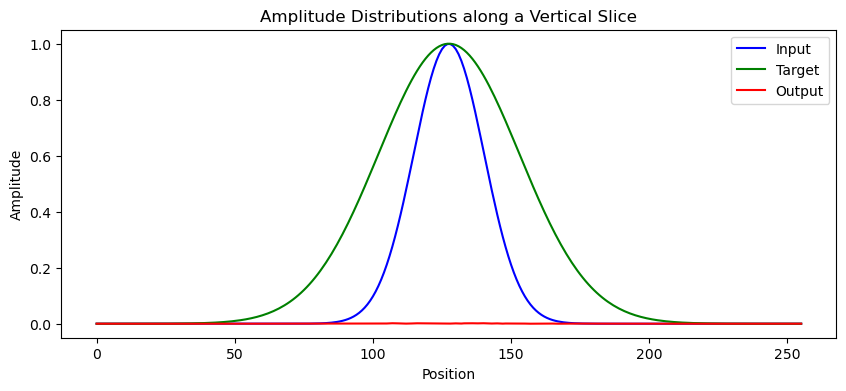

In [24]:
# Extract a vertical or horizontal slice from the 2D amplitude distributions
input_amplitude_slice = np.abs(input_field[size // 2, :])  # Take a vertical slice at the center
target_amplitude_slice = target_amplitude[size // 2, :]
result_amplitude_slice = result_amplitude[size // 2, :]

# Plot the amplitude distributions in 1D
plt.figure(figsize=(10, 4))

plt.plot(input_amplitude_slice, label='Input', color='blue')
plt.plot(target_amplitude_slice, label='Target', color='green')
plt.plot(result_amplitude_slice, label='Output', color='red')

plt.title('Amplitude Distributions along a Vertical Slice')
plt.xlabel('Position')
plt.ylabel('Amplitude')
plt.legend()

plt.show()

# Flat Lorentzian

this is just trying to apply the function given in the paper

In [2]:
def flatLorentzian(r, Rfl, q):
    #last equation
    
    pi = np.pi
    return 1/ (pi * Rfl**2 * (1 + (r / Rfl)**q)**(1 + 2 / q))

In [3]:
def topHatBeam(size, Rfl, q):
    #2d array for top hat beam
    
    x, y = np.meshgrid(np.linspace(-1, 1, size), np.linspace(-1, 1, size))
    radialCoordinates = np.sqrt(x**2 + y**2)
    intensityProfile = flatLorentzian(radialCoordinates, Rfl, q)
    return intensityProfile.astype(float)

In [4]:
def plotIntensity(intensityProfile):
    # plotting 2d intensity profile
    
    plt.imshow(intensityProfile, cmap='viridis', extent=[-1, 1, -1, 1])
    plt.colorbar(label='Intensity')
    plt.title('Modified Flattened-Lorentzian Top-Hat Beam')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

In [11]:
#for usage
size = 200
Rfl = 0.5
q = 2.0

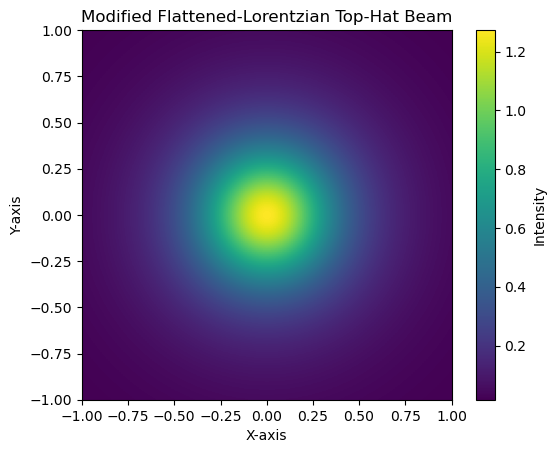

In [12]:
intensityProfile = topHatBeam(size, Rfl, q)
plotIntensity(intensityProfile)